## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [544]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [545]:
#load data
df = pd.read_csv('ab_data.csv')

#### Explore the data:

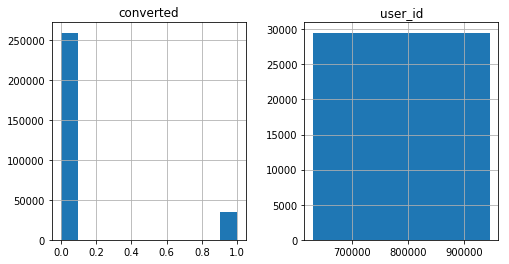

In [546]:
df.hist(figsize=(8,4));

In [547]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


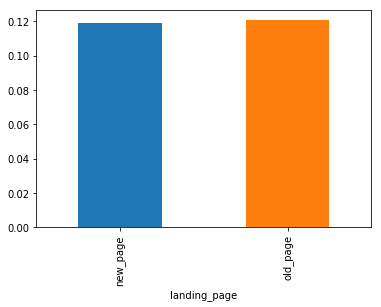

In [548]:
#Porporation of converted pages
df.groupby('landing_page')['converted'].mean().plot(kind = 'bar');

b. Use the cell below to find the number of rows in the dataset.

In [549]:
len(df)

294478

c. The number of unique users in the dataset.

In [550]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [551]:
df.query('converted == 1').user_id.count() / df.converted.count() 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [552]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [553]:
df.query('group == "treatment" & landing_page != "new_page" ').converted.count() + df.query('group == "control" & landing_page == "new_page" ').converted.count()

3893

f. Do any of the rows have missing values?

In [554]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [555]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

- rows doesnt have missing values

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

#### Wrangle & Clean

In [556]:
df2 = df.drop(df.query('group == "treatment" & landing_page != "new_page" ').index )
df2 = df2.drop(df2.query('group == "control" & landing_page == "new_page" ').index )
len(df2)

290585

In [557]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [558]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [559]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [560]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [561]:
len(df2)

290585

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [562]:
df2.drop_duplicates(subset= 'user_id', keep= 'first', inplace=True)
len(df2)

290584

In [563]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [564]:
# probability of an individual converting regardless of the page they receive
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [565]:
# Probability of control group conversion
df2.query('group == "control" & converted == 1').user_id.count() / df2.query('group == "control" ' ).user_id.count()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [566]:
# Probability of treatment group conversion
df2.query('group == "treatment" & converted == 1').user_id.count() / df2.query('group == "treatment" ' ).user_id.count()   

0.11880806551510564

d. What is the probability that an individual received the new page?

In [567]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [568]:
# Probability of new page 
df2.query('landing_page == "new_page" ').user_id.count() / df2.user_id.count()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**


#### There is no evidence support that the new page lead to more conversions.

#### 12.04% of received old page converted in the meantime 11.88%  received the new page converted, concluded that new_page did not increase the conversion rate.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

### Null H0 = old_page >= new_page     

### Alternative H1 = old_page < new_page            

### Type I error if we choose the new wihle the old is better.

### Type II error if we choose the old page while the new is better.





`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [569]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [570]:
# pnew rate under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [571]:
# pold under the null
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [572]:
# number of indiviuals in treatment group
n_new = df2.query('group == "treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [573]:
# number of indiviuals in control group
n_old = df2.query('group == "control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [574]:
# We will use binomial distribution as we have 2 sides 0 and 1 to simulate new page probabiltity to new page count
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted


array([0, 0, 0, ..., 0, 0, 0])

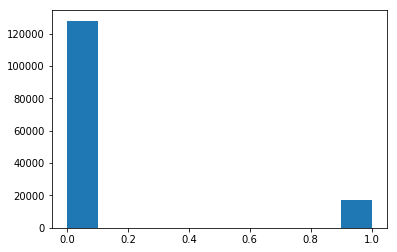

In [575]:
plt.hist(new_page_converted);

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [576]:
# We will use binomnial distrubtion as we have 2 sides 0 and 1 to simulate old page probabiltity to new page count
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted


array([0, 0, 0, ..., 0, 0, 0])

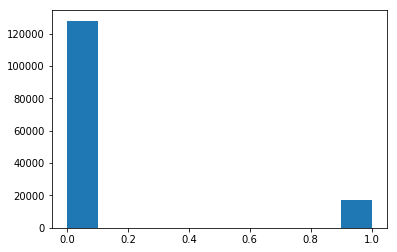

In [577]:
plt.hist(old_page_converted);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [578]:
# Difference between binominal simulated converation rates 
new_page_converted.mean() - old_page_converted.mean()

-0.00016015554932086173

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [579]:
# Create a normal distribution of difference between probability rate of new and probability rate of old 
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())
     
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

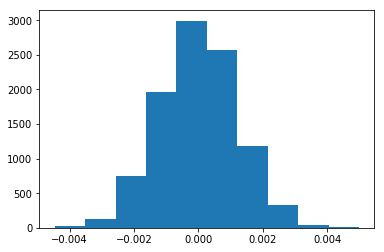

In [580]:
# plot the normal distribution of the difference between conversion rate of new and conversion rate of old
p_diffs = np.array(p_diffs)

plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [581]:
act_diff = df2.query('landing_page == "new_page" ').converted.mean() - df2.query('landing_page == "old_page" ').converted.mean() 
act_diff

-0.0015782389853555567

In [582]:
pd.DataFrame(p_diffs).head()

,0
0,-0.000987
1,0.001147
2,-0.000168
3,0.000081
4,0.000184


In [583]:
(p_diffs > act_diff).mean()

0.90300000000000002

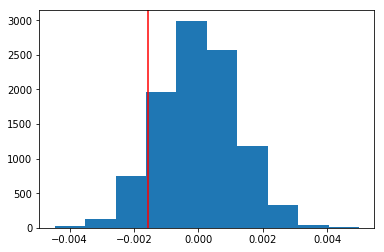

In [584]:
#position of actual difference on simulated normal distribution
plt.hist(p_diffs)
plt.axvline(act_diff, c='r');

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

#### In words, explain what you just computed in part j.
- 90% mean of the normal distribution is greater than the actual difference in the data set

#### What is this value called in scientific studies? 
- p-value = 0.903

#### What does this value mean in terms of whether or not there is a difference between the new and old pages?
- This pvalue means that we cannot reject the null hypothesis and that we do not have sufficient evidence that the new page has a higher conversion rate than the old page as the significance level is higher than 0.05.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [585]:
import statsmodels.api as sm

#number of conversions for each page
convert_old = df2.query('landing_page == "old_page" & converted == 1').user_id.count()
convert_new = df2.query('landing_page == "new_page" & converted == 1').user_id.count()

#the number of individuals who received each page
n_old = df2.query('landing_page == "old_page" ').converted.count()
n_new = df2.query('landing_page == "new_page"').converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [586]:
[convert_old, convert_new], [n_old, n_new]

([17489, 17264], [145274, 145310])

In [587]:
#Getting the z-score and p-value
count = [convert_old, convert_new]
nobs = [n_old, n_new]

z_score, p_value = sm.stats.proportions_ztest(count, nobs, alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

## What do the z-score and p-value mean for the conversion rates of the old and new pages?
- A z_score of " 1.31 " is between -1.65 to 1.65 and p value of 0.9 means that we are more than level of significance  so we cant reject the null.
- Null = the convertion rate of the old page is the same or greater than the convertion rate of the new page

## Do they agree with the findings in parts **j.** and **k.**?
- The p_value at part J & K is .903 and ztest pvalue is .905 so the pvalue is almost the same, so there is no evidence that the new page is better than the old page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**
- binary logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [588]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [589]:
df2['intercept'] = 1 

In [590]:
# Creat dummy variables
df2[['control', 'ab_page']] = pd.get_dummies(df2.group)

In [591]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [592]:
# drop control to make it full rank
df2.drop('control', axis=1, inplace=True)

In [593]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [594]:
#Logistic regression model
lg_m = sm.Logit(df2.converted, df2[['intercept', 'ab_page']]).fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [595]:
lg_m.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:29 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

### What is the p-value associated with ab_page
- 0.1899 / 18% its more than our 5% significance level we cant reject the null.

### Why does it differ from the value you found in Part II
- This is logistic regression test two sided or two tailed test but in part 2 was one side test or one tail test .

### What are the null and alternative hypotheses associated with your regression model
- H0 >= Ha

### how do they compare to the null and alternative hypotheses in Part II
- Its the same as part 2.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
#### Are there any disadvantages to adding additional terms into your regression model?
- Adding more terms will help in a better modeling as it will get closer look on different coeffients, More independent variables will help to get a better look on the dependent variable response.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [596]:
#Load the data set

df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [597]:
# Join the datasets based on the user id column, using an inner join
df2 = df2.set_index('user_id').join(df_countries.set_index('user_id'), how='inner' )
df2.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [598]:
# Creat dummy variables
df2[['US', 'UK', 'CA']] = pd.get_dummies(df2.country)
df2.sample(5)

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
user_id,,,,,,,,,,
855976,2017-01-16 21:04:07.145976,control,old_page,0,1,0,US,0,0,1
650832,2017-01-17 21:55:44.030447,control,old_page,1,1,0,US,0,0,1
840649,2017-01-16 18:52:39.471061,control,old_page,0,1,0,US,0,0,1
736993,2017-01-13 08:10:00.855925,treatment,new_page,0,1,1,US,0,0,1
867937,2017-01-20 06:16:52.333549,treatment,new_page,0,1,1,US,0,0,1


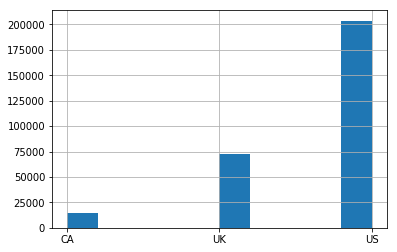

In [599]:
df2.country.hist();

In [600]:
df2.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [601]:
df2.describe()

,converted,intercept,ab_page,US,UK,CA
count,290584.000000,290584.0,290584.000000,290584.000000,290584.000000,290584.000000
mean,0.119597,1.0,0.500062,0.049896,0.249381,0.700723
std,0.324490,0.0,0.500001,0.217731,0.432655,0.457942
min,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.0,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [602]:
# Drop one column to make it full rank, i choose canada as it has less effect
df2 = df2.drop('CA', axis=1)
df2.sample()

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK
user_id,,,,,,,,,
680074,2017-01-14 03:09:06.119373,treatment,new_page,0,1,1,US,0,0


In [603]:
lg_m = sm.Logit(df2.converted, df2[['intercept', 'ab_page', 'US', 'UK']]).fit()
lg_m.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:29 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
US           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

In [604]:
# Get the exponent(odds ratio) to make the coefficients  more interpretable .
np.exp(lg_m.params)

intercept    0.136795
ab_page      0.985168
US           0.960062
UK           1.009932
dtype: float64

#### P_value > 0.05
#### Still we cant reject the null hyposis 
#### The country has no effect on convertion rate
#### UK coefficient shows that for every one unit an increase of 1.009 is expected on convertion rate when other predicators constant.
#### US has almost the same coefficient as UK with 0.96
#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [605]:
#  interaction between page and UK
df2['uk_ab_page'] = df2.UK *df2.ab_page

In [606]:
# interaction between page and US
df2['us_ab_page'] = df2.US *df2.ab_page

#### Explore Data

In [607]:
df2.query('uk_ab_page == 1')['converted'].mean() , df2.query('us_ab_page == 1')['converted'].mean()

(0.1211709965102753, 0.11190247911245035)

In [608]:
df2.query('uk_ab_page == 1')['converted'].sum() , df2.query('us_ab_page == 1')['converted'].sum()

(4375, 817)

In [609]:
df2.query('uk_ab_page == 1')['converted'].count() , df2.query('us_ab_page == 1')['converted'].count()

(36106, 7301)

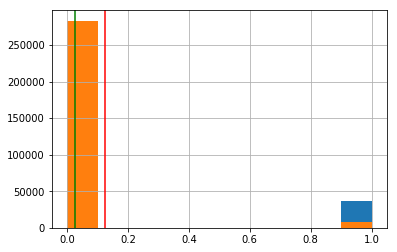

In [610]:
# the rate of convertion at UK is higher than US, we will check that with logistic regression
df2.uk_ab_page.hist() 
df2.us_ab_page.hist()
plt.axvline(df2.uk_ab_page.mean(), c='r')
plt.axvline(df2.us_ab_page.mean(), c='g');

In [611]:
#Create a logistic regression model
log_mod = sm.Logit(df2.converted, df2[['intercept', 'ab_page', 'us_ab_page', 'uk_ab_page']]).fit()
log_mod.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-03-16 16:29 AIC:              212778.9383
No. Observations:   290584           BIC:              212821.2568
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0183    0.0126    -1.4486  0.1475  -0.0430   0.0064
us_ab_page   -0.0644    0.0384    -1.6788  0.0932  -0.1396   0.0108
uk_ab_page    0.0257    0.0188     1.3634  0.1728  -0.0112   0.0625
==================================================================

"""

In [612]:
#We have negative coefficients so we will use exponent to make it more interpertable
np.exp(log_mod.params)[2:4]

us_ab_page    0.937618
uk_ab_page    1.025986
dtype: float64

#### us_ab_page	 P_value > 0.05 cant reject the H0
#### uk_ab_page	 P_value > 0.05 cant reject the H0
#### uk_ab_page coeffienet represent the mean change in the response variable for one unit of change in the predictor variable while holding other predictors in the model constant, estimated coefficients aren't significant (p>0.05)the uk page coefficient indicates that for every additional point "UK customer " we can expect conversion probability to increase by an average of 1.02, A US customer is less likely to convert than UK but the difference isnt huge as the US coefficient 0.93.
#### Still we cant reject the null hyposis , The country has no significant effect on convertion rate.

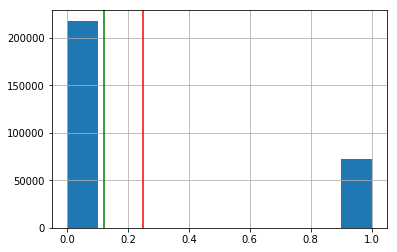

In [613]:
# UK converation rate vs total conversation showing that most of the conversation is from UK
df2.UK.hist();
plt.axvline(df2.UK.mean(), c='r');
plt.axvline(df2.converted.mean(), c='g');

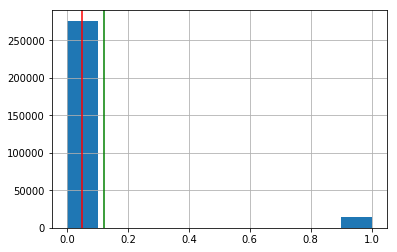

In [614]:
# US converation rate vs total conversation showing that US converation rate is very low
df2.US.hist()
plt.axvline(df2.US.mean(), c='r');
plt.axvline(df2.converted.mean(), c='g');

In [615]:
df2.timestamp = pd.to_datetime(df2.timestamp)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 851104 to 715931
Data columns (total 11 columns):
timestamp       290584 non-null datetime64[ns]
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null uint8
country         290584 non-null object
US              290584 non-null uint8
UK              290584 non-null uint8
uk_ab_page      290584 non-null uint8
us_ab_page      290584 non-null uint8
dtypes: datetime64[ns](1), int64(2), object(3), uint8(5)
memory usage: 16.9+ MB


In [616]:
# LENGHT OF THE EXPERMENT
df2.timestamp.max() - df2.timestamp.min()

Timedelta('21 days 23:59:49.081927')

## Conclusions

- Based on our statistical analysis, Z-test, logistic regression, we have no evidence that the new page created any more conversions, our p-value for the z test and regression model didn't get less than 0.05, which means that we aren't statistically significant to reject the null hypothesis, even we added the countries variable as an independent variable to measure the effect on dependent variable still no statistical significance observed leading that no effect from country predictor on the conversion response despite there is a slight difference between UK and US when we measured the interaction between the page and countries, we noticed that UK has more effect on converted variable than the US.

## Recommendations

- We run the experiment for 21 days and didn't get any significant results that the new page driving more conversion to the product so it recommended keeping the old page as per the results above.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [617]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0